In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import io
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [3]:
ls

cifar_classification.ipynb
data-transfer-learning/
filename.csv
intuitions_on_convolutions.ipynb
london-bss-colab/
Untitled0.ipynb
W6-D5-C2-data-first-transformer/
W6-D5-C3-data-transformer-finetuning-challenge/
Your-first-Transformers.ipynb


In [4]:
data_path = 'london-bss-colab/data_3month/'

In [5]:
data=pd.read_csv(data_path + 'tripcsvbame_3month.csv')

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
#data['usage-stats/'][301:306]

In [8]:
data['usage-stats/'][0]

' 351JourneyDataExtract02Jan2023-08Jan2023.csv'

In [9]:
data['usage-stats/']=data['usage-stats/'].apply(lambda x: x.strip())
data

,usage-stats/
0,351JourneyDataExtract02Jan2023-08Jan2023.csv
1,352JourneyDataExtract09Jan2023-15Jan2023.csv
2,353JourneyDataExtract16Jan2023-22Jan2023.csv
3,354JourneyDataExtract23Jan2023-29Jan2023.csv
4,355JourneyDataExtract30Jan2023-05Feb2023.csv
5,356JourneyDataExtract06Feb2023-12Feb2023.csv
6,357JourneyDataExtract13Feb2023-19Feb2023.csv
7,358JourneyDataExtract20Feb2023-26Feb2023.csv
8,359JourneyDataExtract27Feb2023-05Mar2023.csv
9,360JourneyDataExtract06Mar2023-12Mar2023.csv


In [10]:
data_2023=data
frames=[]
for x in data_2023.index:
  # print((data_path + data_2023['usage-stats/'][x]).replace(' ',''))
  frames.append(pd.read_csv(data_path + data_2023['usage-stats/'][x]))

result = pd.concat(frames)
result.columns

<ipython-input-10-e8764067b4ff>:5: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  frames.append(pd.read_csv(data_path + data_2023['usage-stats/'][x]))
<ipython-input-10-e8764067b4ff>:5: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  frames.append(pd.read_csv(data_path + data_2023['usage-stats/'][x]))


Index(['Number', 'Start date', 'Start station number', 'Start station',
       'End date', 'End station number', 'End station', 'Bike number',
       'Bike model', 'Total duration', 'Total duration (ms)'],
      dtype='object')

In [11]:
dict_columns = {
    "Number": "Rental Id",
    "Total duration (ms)": "Duration",
    "Bike number" : "Bike Id",
    "Start station" : 'StartStation Name',
    'End station': 'EndStation Name',
    'End Date': 'End date',
    'Start Date': 'Start date'
}

In [12]:
result_general = result.rename(columns=dict_columns)
result_general['Duration'] = result_general['Duration']/1000
result_general

,Rental Id,Start date,Start station number,StartStation Name,End date,End station number,EndStation Name,Bike Id,Bike model,Total duration,Duration
0,127804092,2023-01-08 23:59,200252,"Bow Church Station, Bow",2023-01-09 00:05,200249,"Queen Mary's, Mile End",30139,CLASSIC,6m 46s,406.323
1,127804093,2023-01-08 23:59,960,"Hop Exchange, The Borough",2023-01-09 00:06,22180,"Cheapside, Bank",52971,CLASSIC,7m 15s,435.048
2,127804087,2023-01-08 23:58,1152,"Marylebone Lane, Marylebone",2023-01-09 00:03,1164,"Portland Place, Marylebone",30873,CLASSIC,5m 9s,309.267
3,127804088,2023-01-08 23:58,300051,"Hibbert Street, Battersea",2023-01-09 00:03,200187,"Morie Street, Wandsworth",55190,CLASSIC,5m 9s,309.019
4,127804089,2023-01-08 23:58,1201,"Bank of England Museum, Bank",2023-01-09 00:13,22166,"Albert Gardens, Stepney",53576,CLASSIC,15m 1s,901.787
...,...,...,...,...,...,...,...,...,...,...,...
138287,129456954,2023-03-27 00:02,200110,"Bishop's Bridge Road West, Bayswater",2023-03-27 00:06,200017,"Lancaster Gate , Bayswater",21256,CLASSIC,4m 5s,245.341
138288,129456948,2023-03-27 00:02,1100,"Strand, Strand",2023-03-27 00:28,300253,"Bermondsey Station, Bermondsey",41152,CLASSIC,26m 21s,1581.989
138289,129456945,2023-03-27 00:00,3489,"Broadwick Street, Soho",2023-03-27 00:12,1002,"Holy Trinity Brompton, Knightsbridge",60367,PBSC_EBIKE,12m 1s,721.746
138290,129456946,2023-03-27 00:00,990,"Cotton Garden Estate, Kennington",2023-03-27 00:04,10624,"Strata, Elephant & Castle",58401,CLASSIC,3m 19s,199.591


In [13]:
date_format = '%d/%m/%Y %H:%M:%S'
result_general['End date']=pd.to_datetime(result_general['End date'])
result_general['Start date']=pd.to_datetime(result_general['Start date'])
result_general

,Rental Id,Start date,Start station number,StartStation Name,End date,End station number,EndStation Name,Bike Id,Bike model,Total duration,Duration
0,127804092,2023-01-08 23:59:00,200252,"Bow Church Station, Bow",2023-01-09 00:05:00,200249,"Queen Mary's, Mile End",30139,CLASSIC,6m 46s,406.323
1,127804093,2023-01-08 23:59:00,960,"Hop Exchange, The Borough",2023-01-09 00:06:00,22180,"Cheapside, Bank",52971,CLASSIC,7m 15s,435.048
2,127804087,2023-01-08 23:58:00,1152,"Marylebone Lane, Marylebone",2023-01-09 00:03:00,1164,"Portland Place, Marylebone",30873,CLASSIC,5m 9s,309.267
3,127804088,2023-01-08 23:58:00,300051,"Hibbert Street, Battersea",2023-01-09 00:03:00,200187,"Morie Street, Wandsworth",55190,CLASSIC,5m 9s,309.019
4,127804089,2023-01-08 23:58:00,1201,"Bank of England Museum, Bank",2023-01-09 00:13:00,22166,"Albert Gardens, Stepney",53576,CLASSIC,15m 1s,901.787
...,...,...,...,...,...,...,...,...,...,...,...
138287,129456954,2023-03-27 00:02:00,200110,"Bishop's Bridge Road West, Bayswater",2023-03-27 00:06:00,200017,"Lancaster Gate , Bayswater",21256,CLASSIC,4m 5s,245.341
138288,129456948,2023-03-27 00:02:00,1100,"Strand, Strand",2023-03-27 00:28:00,300253,"Bermondsey Station, Bermondsey",41152,CLASSIC,26m 21s,1581.989
138289,129456945,2023-03-27 00:00:00,3489,"Broadwick Street, Soho",2023-03-27 00:12:00,1002,"Holy Trinity Brompton, Knightsbridge",60367,PBSC_EBIKE,12m 1s,721.746
138290,129456946,2023-03-27 00:00:00,990,"Cotton Garden Estate, Kennington",2023-03-27 00:04:00,10624,"Strata, Elephant & Castle",58401,CLASSIC,3m 19s,199.591


In [14]:
results_f = result_general[result_general['Duration']<3600]

In [15]:
results_f

,Rental Id,Start date,Start station number,StartStation Name,End date,End station number,EndStation Name,Bike Id,Bike model,Total duration,Duration
0,127804092,2023-01-08 23:59:00,200252,"Bow Church Station, Bow",2023-01-09 00:05:00,200249,"Queen Mary's, Mile End",30139,CLASSIC,6m 46s,406.323
1,127804093,2023-01-08 23:59:00,960,"Hop Exchange, The Borough",2023-01-09 00:06:00,22180,"Cheapside, Bank",52971,CLASSIC,7m 15s,435.048
2,127804087,2023-01-08 23:58:00,1152,"Marylebone Lane, Marylebone",2023-01-09 00:03:00,1164,"Portland Place, Marylebone",30873,CLASSIC,5m 9s,309.267
3,127804088,2023-01-08 23:58:00,300051,"Hibbert Street, Battersea",2023-01-09 00:03:00,200187,"Morie Street, Wandsworth",55190,CLASSIC,5m 9s,309.019
4,127804089,2023-01-08 23:58:00,1201,"Bank of England Museum, Bank",2023-01-09 00:13:00,22166,"Albert Gardens, Stepney",53576,CLASSIC,15m 1s,901.787
...,...,...,...,...,...,...,...,...,...,...,...
138287,129456954,2023-03-27 00:02:00,200110,"Bishop's Bridge Road West, Bayswater",2023-03-27 00:06:00,200017,"Lancaster Gate , Bayswater",21256,CLASSIC,4m 5s,245.341
138288,129456948,2023-03-27 00:02:00,1100,"Strand, Strand",2023-03-27 00:28:00,300253,"Bermondsey Station, Bermondsey",41152,CLASSIC,26m 21s,1581.989
138289,129456945,2023-03-27 00:00:00,3489,"Broadwick Street, Soho",2023-03-27 00:12:00,1002,"Holy Trinity Brompton, Knightsbridge",60367,PBSC_EBIKE,12m 1s,721.746
138290,129456946,2023-03-27 00:00:00,990,"Cotton Garden Estate, Kennington",2023-03-27 00:04:00,10624,"Strata, Elephant & Castle",58401,CLASSIC,3m 19s,199.591


In [16]:
len(result_general)

1836712

In [17]:
len(results_f)

1805449

In [18]:
result=results_f.dropna()
new_result=result.set_index('Start date').groupby([pd.Grouper(freq='h'), 'StartStation Name', 'EndStation Name']).count()
new_result

Rental Id  \
Start date          StartStation Name                 EndStation Name                            
2023-01-02 00:00:00 Ackroyd Drive, Bow                Alpha Grove, Millwall                  1   
                                                      Devons Road, Bow                       1   
                    Albert Embankment, Vauxhall       Park Street, Bankside                  2   
                                                      Thorndike Close, West Chelsea          1   
                    Bancroft Road, Bethnal Green      Bancroft Road, Bethnal Green           2   
...                                                                                        ...   
2023-04-02 23:00:00 World's End Place, West Chelsea   Eastbourne Mews, Paddington            1   
                    Wormwood Street, Liverpool Street Hop Exchange, The Borough              1   
                                                      Houndsditch, Aldgate                   1   
                    Wren Street, Holborn              Rathbone Street, Fitzrovia             1   
                    York Hall, Bethnal Green          Philpot Street, Whitechapel            1   

                                                                                     Start station number  \
Start date          StartStation Name                 EndStation Name                                       
2023-01-02 00:00:00 Ackroyd Drive, Bow                Alpha Grove, Millwall                             1   
                                                      Devons Road, Bow                                  1   
                    Albert Embankment, Vauxhall       Park Street, Bankside                             2   
                                                      Thorndike Close, West Chelsea                     1   
                    Bancroft Road, Bethnal Green      Bancroft Road, Bethnal Green                      2   
...                                                                                                   ...   
2023-04-02 23:00:00 World's End Place, West Chelsea   Eastbourne Mews, Paddington                       1   
                    Wormwood Street, Liverpool Street Hop Exchange, The Borough                         1   
                                                      Houndsditch, Aldgate                              1   
                    Wren Street, Holborn              Rathbone Street, Fitzrovia                        1   
                    York Hall, Bethnal Green          Philpot Street, Whitechapel                       1   

                                                                                     End date  \
Start date          StartStation Name                 EndStation Name                           
2023-01-02 00:00:00 Ackroyd Drive, Bow                Alpha Grove, Millwall                 1   
                                                      Devons Road, Bow                      1   
                    Albert Embankment, Vauxhall       Park Street, Bankside                 2   
                                                      Thorndike Close, West Chelsea         1   
                    Bancroft Road, Bethnal Green      Bancroft Road, Bethnal Green          2   
...                                                                                       ...   
2023-04-02 23:00:00 World's End Place, West Chelsea   Eastbourne Mews, Paddington           1   
                    Wormwood Street, Liverpool Street Hop Exchange, The Borough             1   
                                                      Houndsditch, Aldgate                  1   
                    Wren Street, Holborn              Rathbone Street, Fitzrovia            1   
                    York Hall, Bethnal Green          Philpot Street, Whitechapel           1   

                                                                                     End station number  \
Start date          Sta

In [19]:
new_result.columns

Index(['Rental Id', 'Start station number', 'End date', 'End station number',
       'Bike Id', 'Bike model', 'Total duration', 'Duration'],
      dtype='object')

In [20]:
new_result['No of trips']=new_result['Duration']

In [21]:
new_result

Rental Id  \
Start date          StartStation Name                 EndStation Name                            
2023-01-02 00:00:00 Ackroyd Drive, Bow                Alpha Grove, Millwall                  1   
                                                      Devons Road, Bow                       1   
                    Albert Embankment, Vauxhall       Park Street, Bankside                  2   
                                                      Thorndike Close, West Chelsea          1   
                    Bancroft Road, Bethnal Green      Bancroft Road, Bethnal Green           2   
...                                                                                        ...   
2023-04-02 23:00:00 World's End Place, West Chelsea   Eastbourne Mews, Paddington            1   
                    Wormwood Street, Liverpool Street Hop Exchange, The Borough              1   
                                                      Houndsditch, Aldgate                   1   
                    Wren Street, Holborn              Rathbone Street, Fitzrovia             1   
                    York Hall, Bethnal Green          Philpot Street, Whitechapel            1   

                                                                                     Start station number  \
Start date          StartStation Name                 EndStation Name                                       
2023-01-02 00:00:00 Ackroyd Drive, Bow                Alpha Grove, Millwall                             1   
                                                      Devons Road, Bow                                  1   
                    Albert Embankment, Vauxhall       Park Street, Bankside                             2   
                                                      Thorndike Close, West Chelsea                     1   
                    Bancroft Road, Bethnal Green      Bancroft Road, Bethnal Green                      2   
...                                                                                                   ...   
2023-04-02 23:00:00 World's End Place, West Chelsea   Eastbourne Mews, Paddington                       1   
                    Wormwood Street, Liverpool Street Hop Exchange, The Borough                         1   
                                                      Houndsditch, Aldgate                              1   
                    Wren Street, Holborn              Rathbone Street, Fitzrovia                        1   
                    York Hall, Bethnal Green          Philpot Street, Whitechapel                       1   

                                                                                     End date  \
Start date          StartStation Name                 EndStation Name                           
2023-01-02 00:00:00 Ackroyd Drive, Bow                Alpha Grove, Millwall                 1   
                                                      Devons Road, Bow                      1   
                    Albert Embankment, Vauxhall       Park Street, Bankside                 2   
                                                      Thorndike Close, West Chelsea         1   
                    Bancroft Road, Bethnal Green      Bancroft Road, Bethnal Green          2   
...                                                                                       ...   
2023-04-02 23:00:00 World's End Place, West Chelsea   Eastbourne Mews, Paddington           1   
                    Wormwood Street, Liverpool Street Hop Exchange, The Borough             1   
                                                      Houndsditch, Aldgate                  1   
                    Wren Street, Holborn              Rathbone Street, Fitzrovia            1   
                    York Hall, Bethnal Green          Philpot Street, Whitechapel           1   

                                                                                     End station number  \
Start date          Sta

In [22]:
new_result = new_result[['No of trips']]

In [23]:
new_result

No of trips
Start date          StartStation Name                 EndStation Name                           
2023-01-02 00:00:00 Ackroyd Drive, Bow                Alpha Grove, Millwall                    1
                                                      Devons Road, Bow                         1
                    Albert Embankment, Vauxhall       Park Street, Bankside                    2
                                                      Thorndike Close, West Chelsea            1
                    Bancroft Road, Bethnal Green      Bancroft Road, Bethnal Green             2
...                                                                                          ...
2023-04-02 23:00:00 World's End Place, West Chelsea   Eastbourne Mews, Paddington              1
                    Wormwood Street, Liverpool Street Hop Exchange, The Borough                1
                                                      Houndsditch, Aldgate                     1
                    Wren Street, Holborn              Rathbone Street, Fitzrovia               1
                    York Hall, Bethnal Green          Philpot Street, Whitechapel              1

[1676696 rows x 1 columns]

In [24]:
df = new_result.reset_index()
df = df.sort_values(by=['Start date'])
df = new_result.reset_index()
df

,Start date,StartStation Name,EndStation Name,No of trips
0,2023-01-02 00:00:00,"Ackroyd Drive, Bow","Alpha Grove, Millwall",1
1,2023-01-02 00:00:00,"Ackroyd Drive, Bow","Devons Road, Bow",1
2,2023-01-02 00:00:00,"Albert Embankment, Vauxhall","Park Street, Bankside",2
3,2023-01-02 00:00:00,"Albert Embankment, Vauxhall","Thorndike Close, West Chelsea",1
4,2023-01-02 00:00:00,"Bancroft Road, Bethnal Green","Bancroft Road, Bethnal Green",2
...,...,...,...,...
1676691,2023-04-02 23:00:00,"World's End Place, West Chelsea","Eastbourne Mews, Paddington",1
1676692,2023-04-02 23:00:00,"Wormwood Street, Liverpool Street","Hop Exchange, The Borough",1
1676693,2023-04-02 23:00:00,"Wormwood Street, Liverpool Street","Houndsditch, Aldgate",1
1676694,2023-04-02 23:00:00,"Wren Street, Holborn","Rathbone Street, Fitzrovia",1


In [25]:
total_stations = pd.concat([df['StartStation Name'],df['EndStation Name']])
total_uniq_stations = np.unique(total_stations).tolist()
len(total_uniq_stations)

804

In [26]:
total_hours = np.unique(df['Start date']).tolist()
len(total_hours)

2175

In [27]:
i = len(total_uniq_stations)
k = len(total_hours)
trips_3darray = np.zeros((i,i,k))
trips_3darray = trips_3darray.astype(np.uint8)

In [28]:
%%time
timeframe_pos = 0
for trip in df.index:
    so = total_uniq_stations.index(df['StartStation Name'][trip])
    sd = total_uniq_stations.index(df['EndStation Name'][trip])
    trips_3darray[so][sd][timeframe_pos] += 1
    if trip < df.index.stop-1:
        if df['Start date'][trip] != df['Start date'][trip+1]:
            timeframe_pos += 1

CPU times: user 1min 15s, sys: 175 ms, total: 1min 15s
Wall time: 1min 15s


In [29]:
trips_3darray

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [30]:
import tensorflow as tf

In [31]:
tensor_trips3d=tf.convert_to_tensor(trips_3darray)

In [32]:
dataset_3darray = tf.data.Dataset.from_tensors(tensor_trips3d)

In [33]:
path_2='london-bss-colab/3darray_3mo'

In [34]:
dataset_3darray.save(path_2)

In [35]:
trips_3darray[:,:,1].sum()

51

In [36]:
trips_3darray.shape

(804, 804, 2175)

In [37]:
all_trips=trips_3darray[:,:,0]
all_trips

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

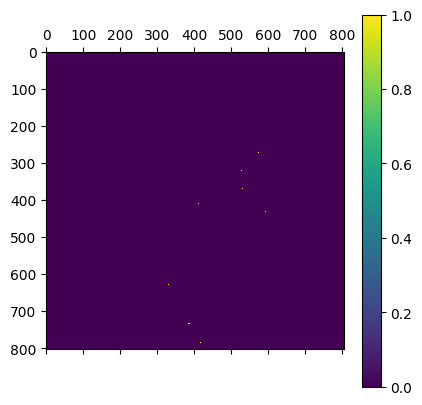

In [38]:
plt.matshow(all_trips)
plt.colorbar()
plt.show()

## Tensor Decomposition

In [39]:
!pip install tensorly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 4.4 MB/s eta 0:00:00


In [40]:
import tensorly as tl
from tensorly.decomposition import tucker

In [41]:
#Represent the trips as a tensor
tensor_trip = tl.tensor(trips_3darray, dtype='float64')

In [42]:
tensor_trip.shape

(804, 804, 2175)

In [43]:
# Rank of Tucker decomposition
tucker_rank = [30, 30, 35]

In [44]:
%%time
core, factors = tucker(tensor_trip, rank=tucker_rank, init='random', tol=10e-5,random_state=12345)

CPU times: user 13min 12s, sys: 5min 38s, total: 18min 51s
Wall time: 53.7 s


In [45]:
core_tensor=tf.convert_to_tensor(core)
dataset_core_tensor=tf.data.Dataset.from_tensors(core_tensor)
path_core='london-bss-colab/core_folder_3mo'
dataset_core_tensor.save(path_core)

In [46]:
type(factors)

list

In [47]:
#Convert the tucker tensor into a full tensor
tucker_rec = tl.tucker_to_tensor((core, factors))

In [48]:
type(tucker_rec)

numpy.ndarray

In [49]:
factors

[array([[ 0.04022631, -0.06354278,  0.00705881, ..., -0.00207805,
          0.02382766,  0.00612881],
        [ 0.00151528, -0.00125546,  0.01006353, ..., -0.01620875,
         -0.00976848, -0.00131813],
        [ 0.01231089, -0.0011168 ,  0.02256659, ...,  0.0437406 ,
          0.01969756,  0.00973459],
        ...,
        [ 0.00969426,  0.00740964,  0.00697696, ...,  0.01519621,
          0.0371305 , -0.02104602],
        [ 0.02563988,  0.00583802, -0.02288755, ..., -0.0205797 ,
          0.00373514,  0.04369905],
        [ 0.03354021,  0.01296115, -0.00126172, ..., -0.05648691,
         -0.04910937, -0.05217283]]),
 array([[ 0.05742783, -0.03797467, -0.04665269, ...,  0.00703534,
         -0.03646093,  0.05082355],
        [ 0.00108468,  0.0028744 , -0.00711382, ...,  0.01363983,
          0.0048812 ,  0.00263645],
        [ 0.00781373,  0.01069321, -0.01533276, ..., -0.02348621,
         -0.01930672, -0.02553464],
        ...,
        [ 0.0046569 ,  0.00613847, -0.00311517, ..., -

In [60]:
path_3='london-bss-colab/factors_folder_3mo/'
os.makedirs(path_3)

In [61]:
for i,factor in enumerate(factors):
  df=pd.DataFrame(factor)
  df.to_csv(path_3+str(i)+'.csv')


In [42]:
factors[1].shape

(804, 10)

In [43]:
factors[2].shape

(2175, 15)

In [44]:
import requests

In [45]:
response= requests.get('https://api.tfl.gov.uk/BikePoint/')
stations = response.json()

In [46]:
data =  pd.DataFrame()
s_names = []
s_lat = []
s_lon = []

NbBikes = []
NbEmptyDocks = []
NbDocks = []
NbStandardBikes = []
NbEBikes = []
s_id = []

In [47]:
len_lat = 0
for station in stations:
    s_names.append(station['commonName'])
    s_lat.append(float(station['lat']))
    s_lon.append(float(station['lon']))
    for add_property in station['additionalProperties']:
        if add_property['key'] == 'NbBikes':
            NbBikes.append(int(add_property['value']))
        if add_property['key'] == 'NbEmptyDocks':
            NbEmptyDocks.append(int(add_property['value']))
        if add_property['key'] == 'NbDocks':
            NbDocks.append(int(add_property['value']))
        if add_property['key'] == 'NbStandardBikes':
            NbStandardBikes.append(int(add_property['value']))
        if add_property['key'] == 'NbEBikes':
            NbEBikes.append(int(add_property['value']))
        if add_property['key'] == 'TerminalName':
            s_id.append(int(add_property['value']))


In [48]:
data['Station_name'] = s_names
data['s_lat'] = s_lat
data['s_lon'] = s_lon
data['s_num_bikes'] = NbBikes
data['s_num_empty_docks'] = NbEmptyDocks
data['s_num_std_bikes'] = NbStandardBikes
data['s_num_e-bikes'] = NbEBikes
data['s_num_docks'] = data['s_num_bikes'] + data['s_num_empty_docks']
data['s_id'] = s_id

In [49]:
data

,Station_name,s_lat,s_lon,s_num_bikes,s_num_empty_docks,s_num_std_bikes,s_num_e-bikes,s_num_docks,s_id
0,"River Street , Clerkenwell",51.529163,-0.109970,11,8,10,1,19,1023
1,"Phillimore Gardens, Kensington",51.499606,-0.197574,11,25,11,0,36,1018
2,"Christopher Street, Liverpool Street",51.521283,-0.084605,31,1,31,0,32,1012
3,"St. Chad's Street, King's Cross",51.530059,-0.120973,3,20,3,0,23,1013
4,"Sedding Street, Sloane Square",51.493130,-0.156876,16,10,16,0,26,3420
...,...,...,...,...,...,...,...,...,...
792,"Brandon Street, Walworth",51.489102,-0.091548,4,16,4,0,20,300060
793,"The Blue, Bermondsey",51.492221,-0.062513,5,16,5,0,21,300059
794,"Coomer Place, West Kensington",51.483570,-0.202038,21,6,21,0,27,200081
795,"Hortensia Road, West Brompton",51.481765,-0.185273,7,21,7,0,28,300091


In [50]:
# South East limits
se_limit_lat = 51.523811 # everthing lower than this value is south east
se_limit_lon = -0.101342 # everything greater than this value is south east

# East limits
e_limit_lat = 51.523811 # everything greater than this value is east
e_limit_lon = -0.022306 # everything greater than this is east

# South West limits
sw_limit_lat = 51.501631 # everthing lower than this value is south east
sw_limit_lon = -0.101342 # everything lower than this value is south east

# West limits
w_limit_lat = 51.501072  # everthing greater than this value is south east
w_limit_lon = -0.182406  # everthing lower than this value is south east

# Central limits
c_toplimit_lat = 51.501072 # everthing greater than this value is central
c_lowlimit_lat = 51.523811 # everything lower than this value is central

c_toplimit_lon = -0.101342 # everything lower than this value is central
c_lowlimit_lon = -0.182406 # everthing greater than this value is central

# North limits
n_toplimit_lon = -0.022306 # everything lower than this value is central
n_lowlimit_lon = -0.182406 # everthing greater than this value is central

n_lowlimit_lat = 51.523811 # everthing greater than this value is central

In [51]:
loc = []

In [52]:
for station in data.index:
    if data['s_lat'][station] > c_toplimit_lat and data['s_lat'][station]< c_lowlimit_lat and data['s_lon'][station]< c_toplimit_lon and data['s_lon'][station]>c_lowlimit_lon:
        loc.append(1) # Central
    elif data['s_lon'][station] < n_toplimit_lon and data['s_lon'][station] > n_lowlimit_lon and data['s_lat'][station] > n_lowlimit_lat:
        loc.append(2) # North
    elif data['s_lon'][station] < w_limit_lon and data['s_lat'][station] > w_limit_lat:
        loc.append(3) # West
    elif data['s_lon'][station] < sw_limit_lon and data['s_lat'][station] < sw_limit_lat:
        loc.append(4)  # South_West
    elif data['s_lon'][station] > e_limit_lon and data['s_lat'][station] > e_limit_lat:
        loc.append(5) # East
    elif data['s_lon'][station] > se_limit_lon and data['s_lat'][station] < se_limit_lat:
        loc.append(6) # South East
    else:
        loc.append('Other')

In [53]:
data['Area_loc'] = loc

In [54]:
data

,Station_name,s_lat,s_lon,s_num_bikes,s_num_empty_docks,s_num_std_bikes,s_num_e-bikes,s_num_docks,s_id,Area_loc
0,"River Street , Clerkenwell",51.529163,-0.109970,11,8,10,1,19,1023,2
1,"Phillimore Gardens, Kensington",51.499606,-0.197574,11,25,11,0,36,1018,4
2,"Christopher Street, Liverpool Street",51.521283,-0.084605,31,1,31,0,32,1012,6
3,"St. Chad's Street, King's Cross",51.530059,-0.120973,3,20,3,0,23,1013,2
4,"Sedding Street, Sloane Square",51.493130,-0.156876,16,10,16,0,26,3420,4
...,...,...,...,...,...,...,...,...,...,...
792,"Brandon Street, Walworth",51.489102,-0.091548,4,16,4,0,20,300060,6
793,"The Blue, Bermondsey",51.492221,-0.062513,5,16,5,0,21,300059,6
794,"Coomer Place, West Kensington",51.483570,-0.202038,21,6,21,0,27,200081,4
795,"Hortensia Road, West Brompton",51.481765,-0.185273,7,21,7,0,28,300091,4


In [55]:
data.loc[data.Station_name == 'Chepstow Villas, Notting Hill'].values[0][9]

3

In [56]:
color_stations = []
for station in total_uniq_stations:
  info_val = data.loc[data.Station_name == station].values
  if len(info_val)>0:
    color_stations.append(data.loc[data.Station_name == station].values[0][9])
  else:
    color_stations.append(7)

In [57]:
len(color_stations)

804

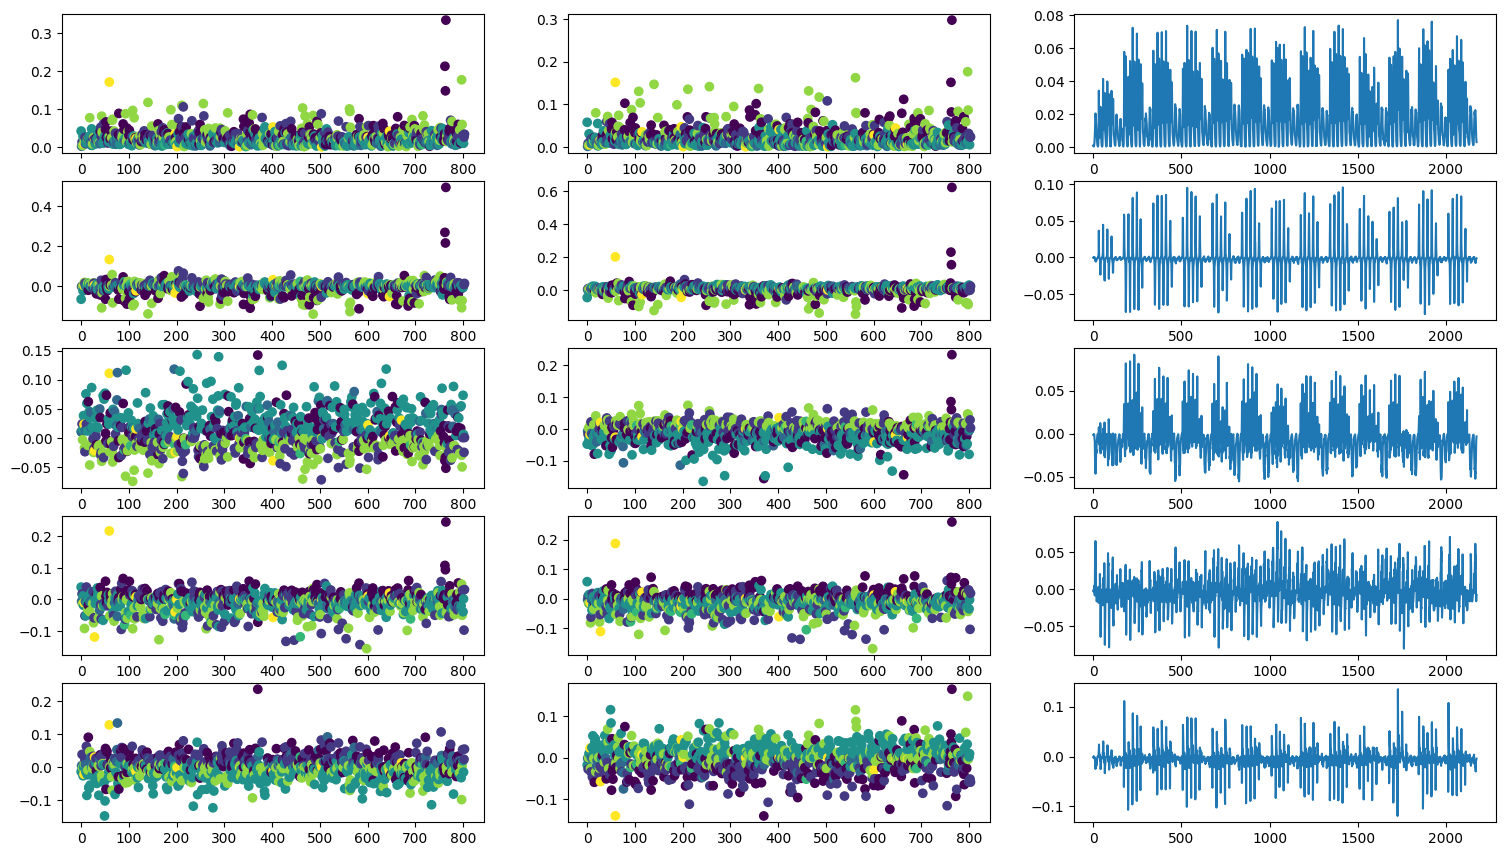

In [58]:
fig, axs = plt.subplots(5, 3)
fig.set_size_inches(18.5, 10.5)
axs[0, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[0], c=color_stations)
axs[0, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[0], c=color_stations)
axs[0, 2].plot(np.transpose(factors[2])[0])

axs[1, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[1], c=color_stations)
axs[1, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[1], c=color_stations)
axs[1, 2].plot(np.transpose(factors[2])[1])

axs[2, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[2], c=color_stations)
axs[2, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[2], c=color_stations)
axs[2, 2].plot(np.transpose(factors[2])[2])

axs[3, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[3], c=color_stations)
axs[3, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[3], c=color_stations)
axs[3, 2].plot(np.transpose(factors[2])[3])

axs[4, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[4], c=color_stations)
axs[4, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[4], c=color_stations)
axs[4, 2].plot(np.transpose(factors[2])[4])

In [59]:
factors[2].shape

(2175, 15)

In [60]:
type(factors[2])

numpy.ndarray

In [61]:
from google.colab import files

In [62]:
# convert array into dataframe
result_df = pd.DataFrame(factors[2])

In [63]:
result_df['timestamp'] = pd.to_datetime(total_hours)

In [ ]:
result_df.to_csv('filename.csv')
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>